In [1]:
import pandas as pd
import numpy as np

me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [2]:
cols = ['Lo 20', 'Hi 20']
returns = me_m[cols]
returns

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16
...,...,...
201808,3.09,2.49
201809,-2.04,0.19
201810,-10.52,-7.41
201811,-2.78,2.49


<AxesSubplot:>

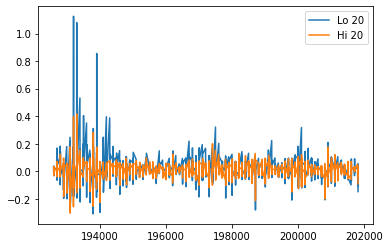

In [3]:
returns = returns/100
returns.plot()

In [4]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.336701
Hi 20    0.195116
dtype: float64

In [5]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

Lo 20    0.011860
Hi 20    0.007859
dtype: float64

In [6]:
annualized_return = (return_per_month + 1)**12-1

In [7]:
annualized_return = (returns+1).prod()**(12/n_months) - 1
annualized_return

Lo 20    0.151977
Hi 20    0.098490
dtype: float64

In [8]:
returns.index


Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [9]:
returns.index = pd.to_datetime(returns.index, format="%Y%m")
returns.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [10]:
quiz_returns = returns["1999":"2015"]
quiz_returns

,Lo 20,Hi 20
1999-01-01,0.1114,0.0153
1999-02-01,-0.0399,-0.0172
1999-03-01,-0.0308,0.0368
1999-04-01,0.0824,0.0679
1999-05-01,0.0435,-0.0048
...,...,...
2015-08-01,-0.0347,-0.0559
2015-09-01,-0.0610,-0.0333
2015-10-01,0.0385,0.0710
2015-11-01,0.0165,0.0015


In [11]:
quiz_returns.index = quiz_returns.index.to_period('M')
quiz_returns.head()

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048


In [12]:
quiz_returns.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 204 entries, 1999-01 to 2015-12
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lo 20   204 non-null    float64
 1   Hi 20   204 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [13]:
quiz_rets = quiz_returns["1999":"2015"]
quiz_rets

,Lo 20,Hi 20
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [14]:
quiz_n_months = quiz_rets.shape[0]
quiz_annualized_return = (quiz_rets+1).prod()**(12/quiz_n_months) - 1
quiz_annualized_return

Lo 20    0.114426
Hi 20    0.062865
dtype: float64

In [15]:
quiz_n_months = quiz_rets.shape[0]
quiz_n_months

204

In [16]:
annualized_vol = quiz_returns.std()*np.sqrt(12)
annualized_vol

Lo 20    0.228894
Hi 20    0.172713
dtype: float64